In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
df = pd.read_csv('concrete_data.csv')
df.head()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
print(df.shape)
print(df.isnull().sum())
df.describe()


(1030, 9)
Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")
lr_cv = LinearRegression()
print(f"Cross-val Score: {np.mean(cross_val_score(lr_cv, X, y, scoring='r2'))}")


R2 Score: 0.627553179231485
Cross-val Score: 0.46099404916628606


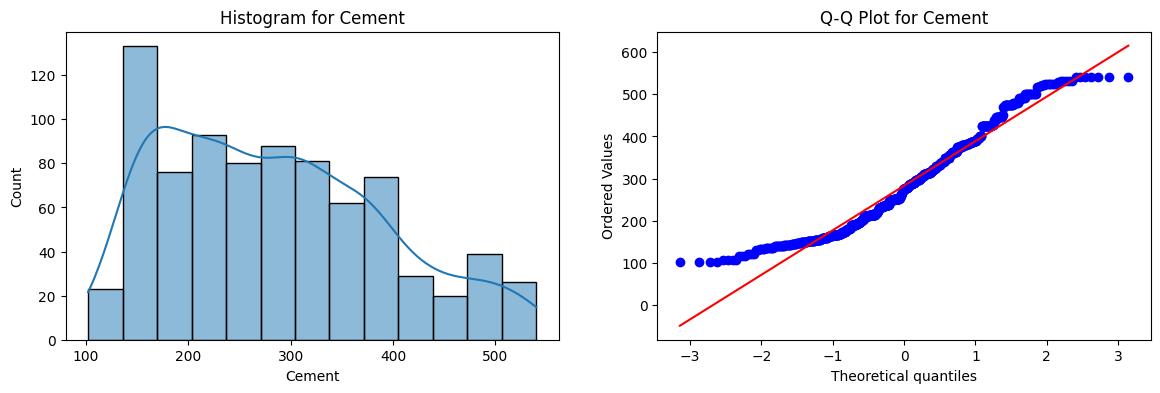

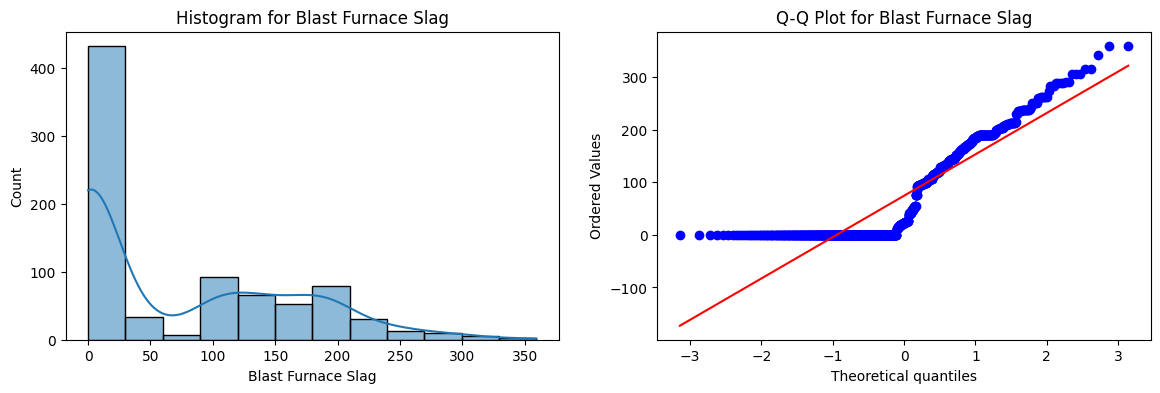

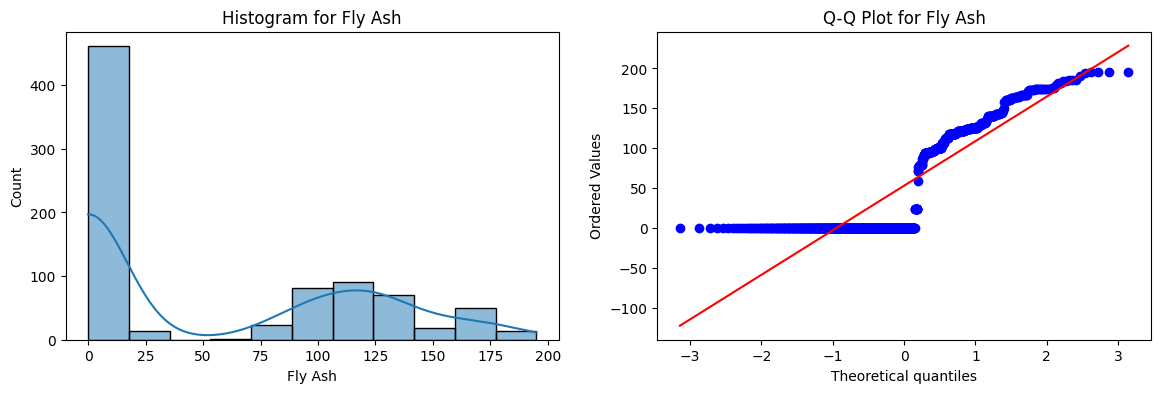

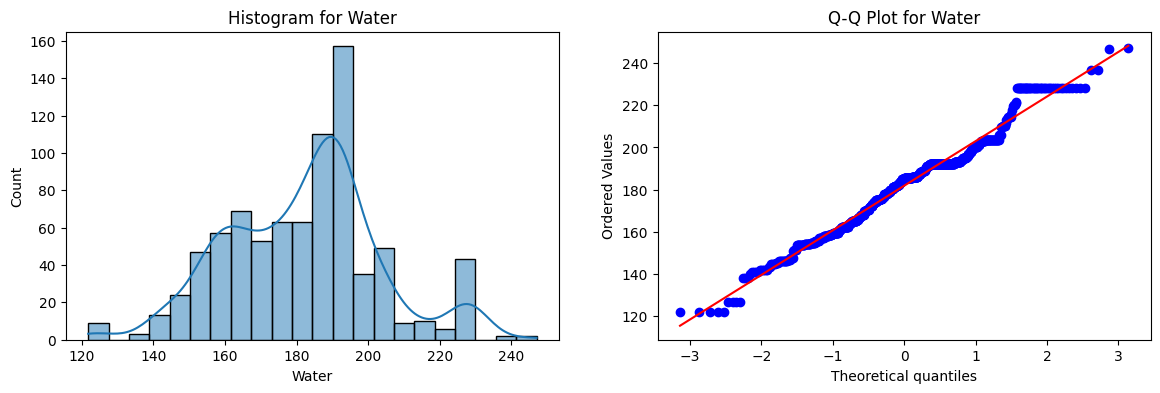

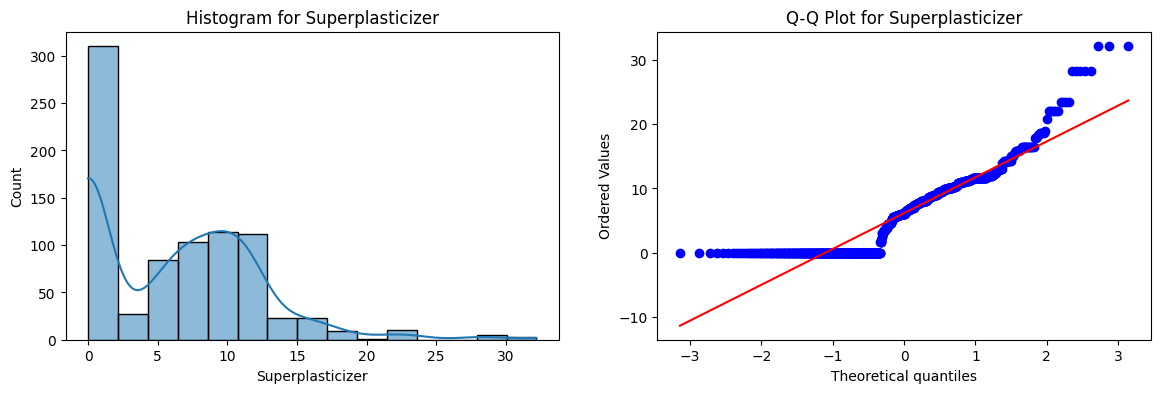

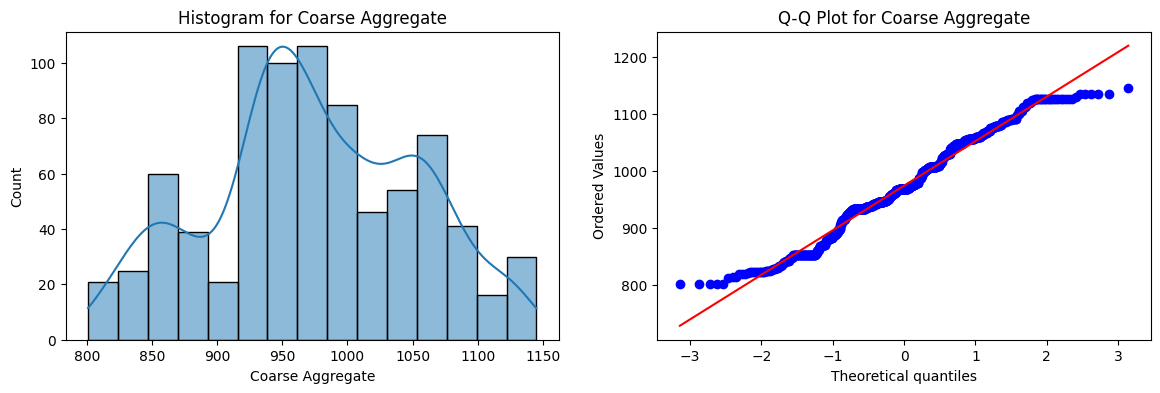

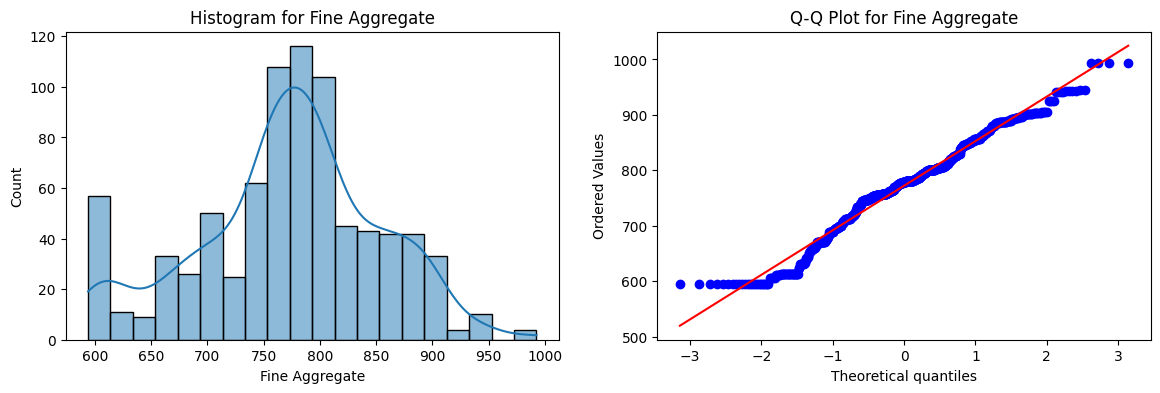

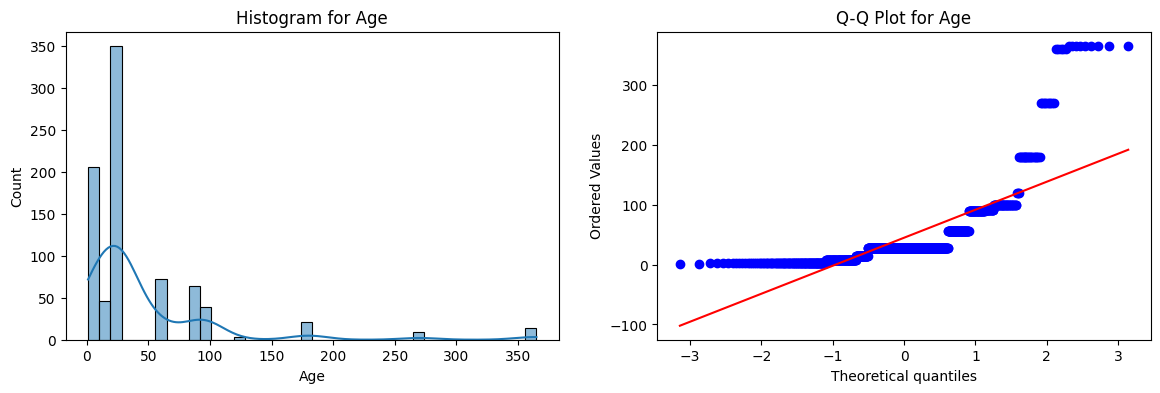

In [ ]:
for col in X_train.columns:
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Histogram for {col}')
    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)

    plt.title(f'Q-Q Plot for {col}')


In [ ]:
pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train + 0.000001)
X_test_transformed = pt.transform(X_test + 0.000001)
lambda_df = pd.DataFrame({'Feature': X_train.columns, 'Box-Cox Lambda': pt.lambdas_})
print(lambda_df)

              Feature  Box-Cox Lambda
0              Cement        0.177025
1  Blast Furnace Slag        0.025093
2             Fly Ash       -0.038970
3               Water        0.772682
4    Superplasticizer        0.098811
5    Coarse Aggregate        1.129813
6      Fine Aggregate        1.782018
7                 Age        0.066631


In [ ]:
lr_boxcox = LinearRegression()
lr_boxcox.fit(X_train_transformed, y_train)
y_pred_boxcox = lr_boxcox.predict(X_test_transformed)
print(f"R2 Score with Box-Cox: {r2_score(y_test, y_pred_boxcox)}")
print(f"Cross-val Score with Box-Cox: {np.mean(cross_val_score(lr_boxcox, X_train_transformed, y_train, scoring='r2'))}")


R2 Score with Box-Cox: 0.8047824993083206
Cross-val Score with Box-Cox: 0.7923976598707081


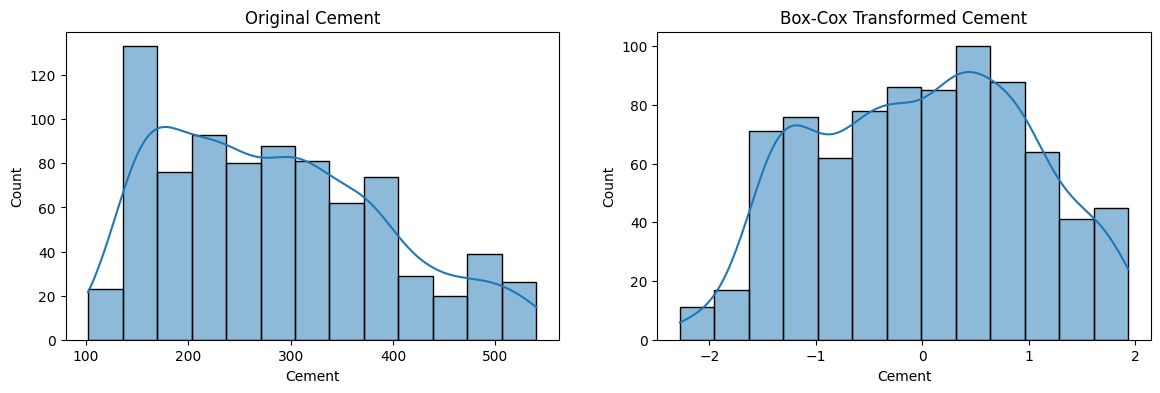

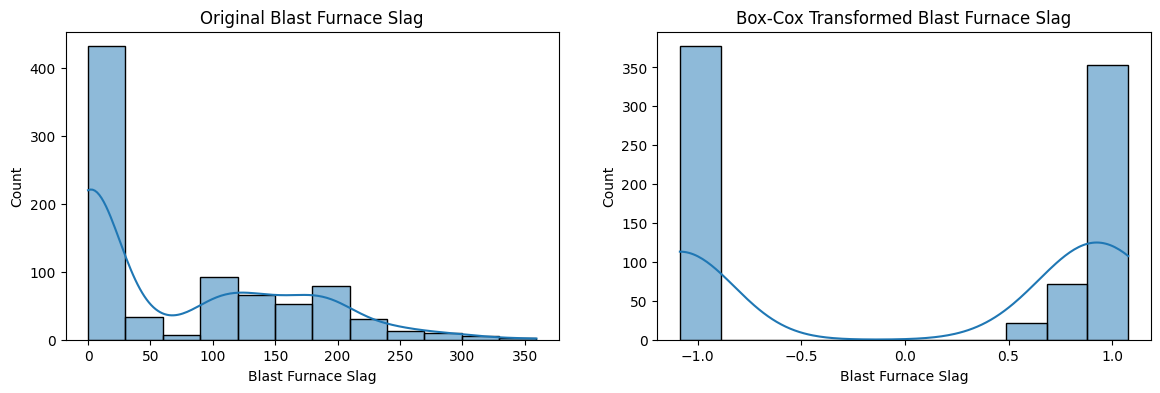

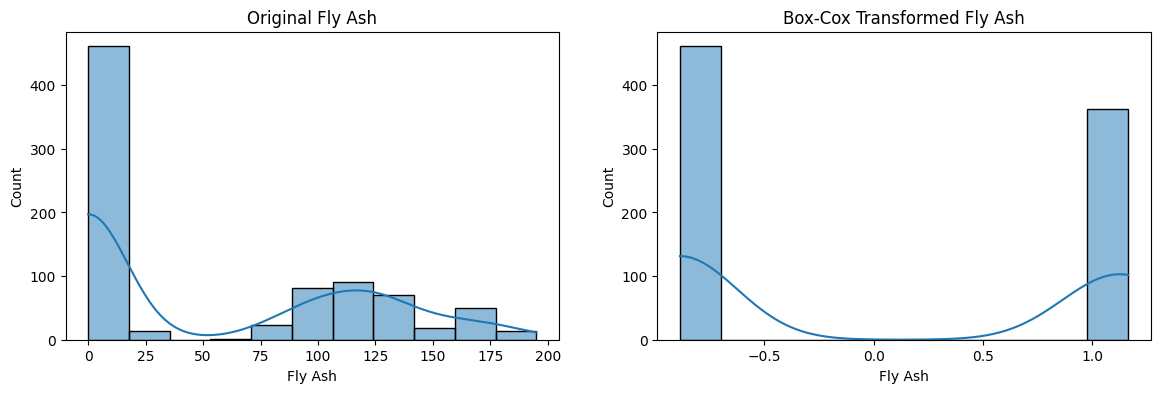

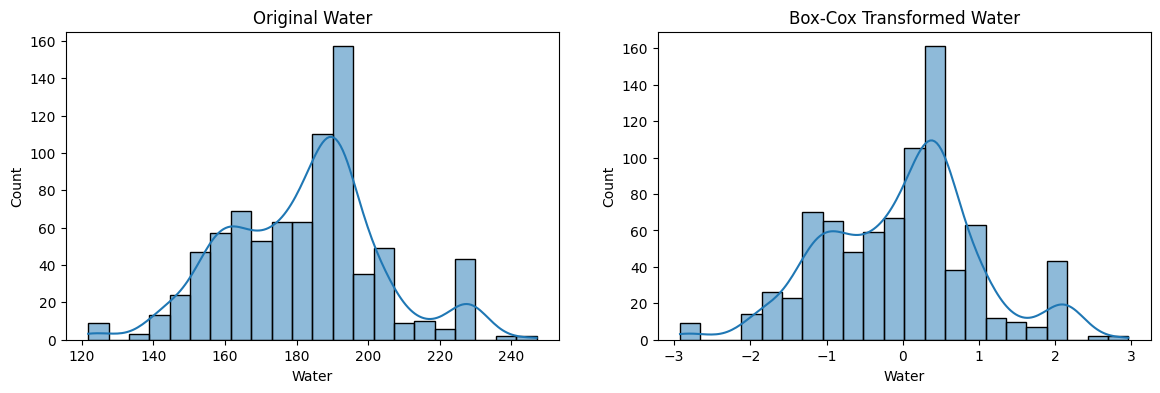

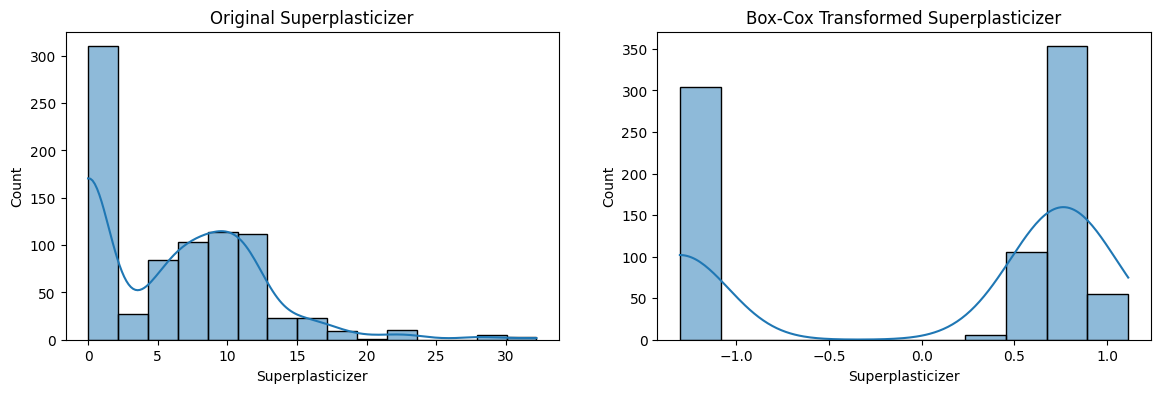

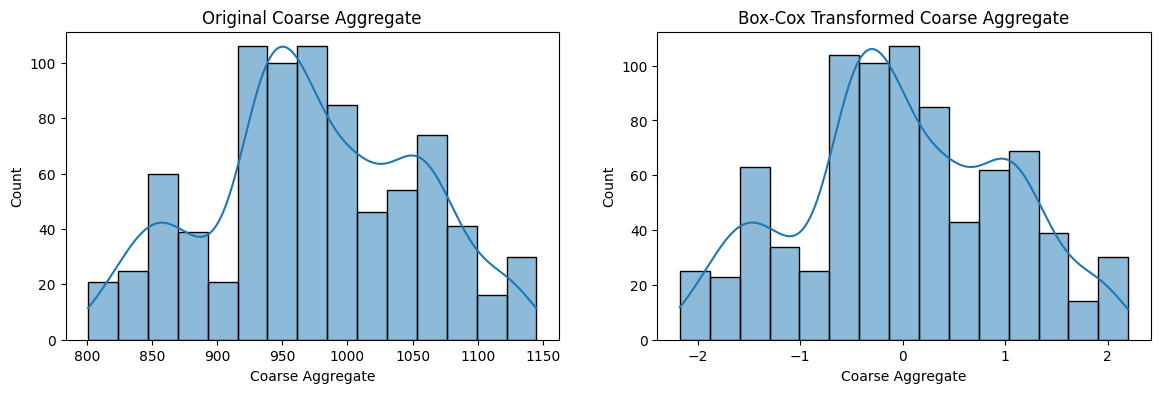

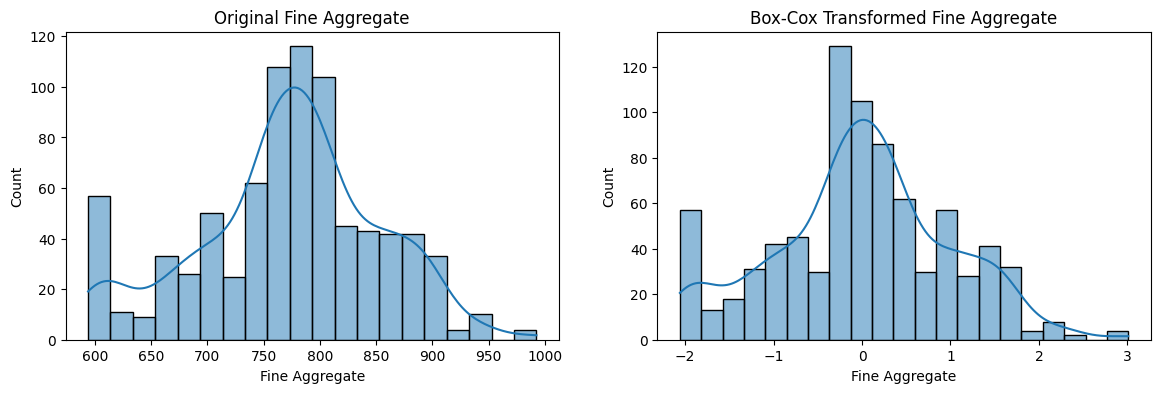

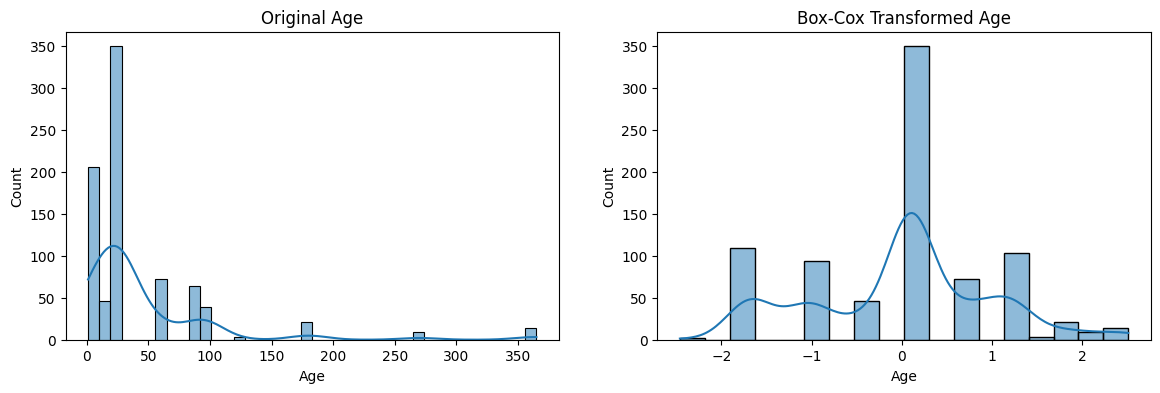

In [ ]:
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train.columns)
for col in X_train_transformed_df.columns:
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Original {col}')
    plt.subplot(122)
    sns.histplot(X_train_transformed_df[col], kde=True)
    plt.title(f'Box-Cox Transformed {col}')



In [ ]:
pt1 = PowerTransformer()
X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)
lambda_df_yj = pd.DataFrame({'Feature': X_train.columns, 'Yeo-Johnson Lambda': pt1.lambdas_})
print(lambda_df_yj)


              Feature  Yeo-Johnson Lambda
0              Cement            0.174348
1  Blast Furnace Slag            0.015715
2             Fly Ash           -0.161447
3               Water            0.771307
4    Superplasticizer            0.253935
5    Coarse Aggregate            1.130050
6      Fine Aggregate            1.783100
7                 Age            0.019885


In [ ]:
lr_yj = LinearRegression()
lr_yj.fit(X_train_transformed2, y_train)
y_pred_yj = lr_yj.predict(X_test_transformed2)
print(f"R2 Score with Yeo-Johnson: {r2_score(y_test, y_pred_yj)}")
print(f"Cross-val Score with Yeo-Johnson: {np.mean(cross_val_score(lr_yj, X_train_transformed2, y_train, scoring='r2'))}")


R2 Score with Yeo-Johnson: 0.8161906512004999
Cross-val Score with Yeo-Johnson: 0.7941782180737023
